In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from pathlib import Path
from collections import Counter
import re
import json

# Syscall By Arch

In [4]:
num_x86_calls = 608 - 247 + 1

unique_calls = {
    "x86_64": 56,
    "aarch64": 0,
    "rv64": 2
}

common_calls = num_x86_calls - unique_calls["x86_64"]

archs = ["x86_64", "rv64", "aarch64"]

syscall_archs = {}

for arch in archs:
    syscall_archs[arch] = {
        "common": common_calls,
        "unique": unique_calls[arch]
    }
print(syscall_archs)

{'x86_64': {'common': 306, 'unique': 56}, 'rv64': {'common': 306, 'unique': 2}, 'aarch64': {'common': 306, 'unique': 0}}


['x86_64', 'rv64', 'aarch64'] [306, 306, 306] green [0, 0, 0] common
['x86_64', 'rv64', 'aarch64'] [56, 2, 0] orange [306, 306, 306] arch-specific


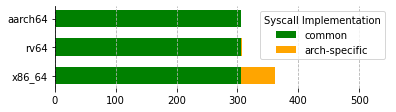

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(1.5)

keys = list(syscall_archs.keys())
common_vals = [x["common"] for x in syscall_archs.values()]
unique_vals = [x["unique"] for x in syscall_archs.values()]

colors = ["green", "orange"]
labels = ["common", "arch-specific"]
lefts = [0, 0, 0]
b = []
for bars, col, label in zip([common_vals, unique_vals], colors, labels):
    print(keys, bars, col, lefts, label)
    b = ax.barh(keys, bars, left=lefts, color=col, height=0.6, label=label)
    lefts = [lefts[i] + bars[i] for i in range(len(common_vals))]

ax.set_xlim(right=550)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(linestyle='dashed')
ax.legend(title="Syscall Implementation", loc="upper right")

In [6]:
fig.savefig("figures/syscall_archs", dpi=600, bbox_inches='tight')

# Syscall Diagnostics

In [19]:
def parse_strace_summary(filename):
    syscalls = {}

    with open(filename, 'r') as file:
        lines = file.readlines()

        for line in lines[2:-2]:  # Skipping the headers
            parts = line.split()
            if len(parts) < 5:
                continue
            
            # Check if the 'errors' column is populated
            if parts[4].isdigit():
                syscall = parts[5]
            else:
                syscall = parts[4]
                
            calls = math.log(int(parts[3]))
            syscalls[syscall] = calls

    return syscalls

# Testing the function
sp_path = Path("syscall_profiles/")

sp_dict = {file.name.split('.')[0]: parse_strace_summary(file) for file in sp_path.iterdir()}

total_sp = {}
print(f"Num bins: {len(sp_dict)}")
for v in sp_dict.values():
    for sc, ct in v.items():
        if sc not in total_sp:
            total_sp[sc] = ct
        else:
            total_sp[sc] += ct
print(f"Num syscalls: {len(total_sp)}")
# Total sp: syscall_freq
#66
#66
#68
#68
#71
#74
#94
#98

Num bins: 8
Num syscalls: 103


In [20]:
## Parse file to get syscall NRs index dict
##  sysidx_dict: Map SC to number
##  syscall_names: Map number to SC
##  call_freq_scale: Sorted by aggregate
#syscall_names = [None] * 500
#with open("meta/syscall_list.nr", "r") as f:
#    pattern = re.compile(r"__NR_(\S*)\s+(\d+)")
#    matches = [pattern.search(line) for line in f.readlines()]
#    sysidx_dict = {match.group(1): int(match.group(2)) for match in matches}
#    for k, v in sysidx_dict.items():
#        syscall_names[v] = k
#        
#call_freq_scale = sorted(sysidx_dict, key=sysidx_dict.get)
#print(call_freq_scale)

In [21]:
#print(total_sp)
sorted_total_sp = {k: v for k, v in sorted(total_sp.items(), key=lambda item: item[1])[::-1]}
print(sorted_total_sp)

{'read': 51.07115933482176, 'write': 50.09002858515962, 'clock_nanosleep': 41.634824384691996, 'mmap': 41.01007654308474, 'openat': 39.73277585463864, 'close': 37.52859639108411, 'fstat': 33.094485381864686, 'mprotect': 32.93449936717178, 'pread64': 31.28034959591348, 'brk': 28.60251502590333, 'lseek': 28.513352507074096, 'rt_sigaction': 27.750838573033537, 'stat': 25.571087842084218, 'futex': 22.372733135469677, 'rt_sigprocmask': 21.882445861107076, 'getpid': 21.22110562047879, 'writev': 20.754382919583797, 'munmap': 20.56729760236678, 'fcntl': 20.499395621675887, 'access': 20.099865090273937, 'recvfrom': 18.094041936302055, 'getuid': 18.05965348527477, 'geteuid': 17.874808136892227, 'arch_prctl': 17.861323482596067, 'poll': 17.809216660276206, 'getrusage': 17.727267928114493, 'getegid': 17.715881946171944, 'getgid': 17.715881946171944, 'lstat': 16.997842723171782, 'ioctl': 16.095375491802045, 'clone': 15.619698473099254, 'set_robust_list': 15.275155747534061, 'prlimit64': 14.27136708

['read', 'write', 'clock_nanosleep', 'mmap', 'openat', 'close', 'fstat', 'mprotect', 'pread64', 'brk', 'lseek', 'rt_sigaction', 'stat', 'futex', 'rt_sigprocmask', 'getpid', 'writev', 'munmap', 'fcntl', 'access', 'recvfrom', 'getuid', 'geteuid', 'arch_prctl', 'poll', 'getrusage', 'getegid', 'getgid', 'lstat', 'ioctl', 'clone', 'set_robust_list', 'prlimit64', 'execve', 'dup2', 'wait4', 'sched_yield', 'sysinfo', 'getppid', 'pipe2', 'rt_sigreturn', 'mremap', 'getpgrp', 'socket', 'sendmsg', 'connect', 'getdents64', 'newfstatat', 'madvise', 'unlink', 'uname', 'getcwd', 'set_tid_address', 'pipe', 'select', 'clock_gettime', 'epoll_wait', 'readlink', 'vfork', 'chdir', 'sched_getaffinity', 'epoll_ctl', 'statfs', 'alarm', 'umask', 'gettid', 'faccessat', 'unlinkat', 'fadvise64', 'setsockopt', 'chmod', 'getxattr', 'get_mempolicy', 'set_mempolicy', 'epoll_create1', 'getsockname', 'eventfd2', 'getpeername', 'accept4', 'getrandom', 'lgetxattr', 'recvmsg', 'bind', 'fchown', 'fchmod', 'utime', 'sigaltst

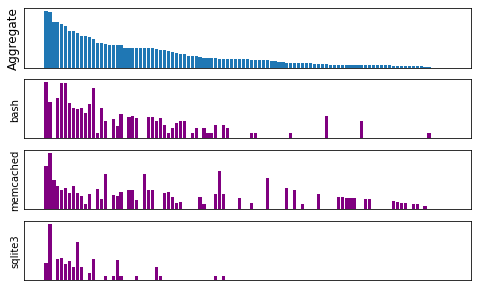

In [22]:
N = None

def top_n(d):
    return list(d)[:N]

xscale = top_n(sorted_total_sp.keys())
print(xscale)

def plot_profile(lst, i, app_name):
    vals = np.array(top_n(lst), dtype=float)
    vals /= np.sum(vals)
    p1 = ax[i].bar(xscale, vals, color='purple')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylabel(app_name.split('-')[0], fontsize='10')
    

apps = ["bash", "memcached-testapp", "sqlite3"] #"paho-bench"

fig, ax = plt.subplots(1+len(apps), 1, figsize=(8, 5))

# Total
vals = np.array(top_n(sorted_total_sp.values()), dtype=float)
vals /= np.sum(vals)
p1 = ax[0].bar(xscale, vals)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_ylabel("Aggregate", fontsize='12')


i = 1
for app in apps:
    sp_app = sp_dict[app]
    sorted_sp = [sp_app[x] if x in sp_app else 0 for x in xscale]
    plot_profile(sorted_sp, i, app)
    i += 1

#colors = ["green", "orange", "red"]
#labels = ["common", "mirror", "unique"]
#b = []
#for bars, col, label in zip([common_vals, mirror_vals, unique_vals], colors, labels):
#    b = ax.barh(keys, bars, left=lefts, color=col, height=0.6, label=label)
#    lefts = [lefts[i] + bars[i] for i in range(len(common_vals))]
#

#ax.set_xlim(right=550)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.xaxis.grid(linestyle='dashed')
#ax.legend(title="Syscalls by Arch", loc="upper right")

In [23]:
fig.savefig("figures/syscall_profile", dpi=600, bbox_inches='tight')

# WALI Microbenchmarks